# Sweetness Prediction using lasso and ridge

In [1]:
# loading libraries 
library(glmnet)
library(caTools)
set.seed(100)

Warning message:
"package 'glmnet' was built under R version 3.4.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.4.3"Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.4.3"Loaded glmnet 2.0-13



In [2]:
# Reading data
sp <- read.csv("C:/Users/Shubham Shukla/Desktop/internship/new/sweetness_prediction/ecfp.csv")
sp1 <- read.csv("C:/Users/Shubham Shukla/Desktop/internship/new/sweetness_prediction/new_data/ecfp_new.csv")

In [3]:
# Splitting sp data into training and testing set

split <- sample.split(sp$Sweetness, SplitRatio = 0.75)
train <- subset(sp, split == T)
test <- subset(sp, split == F)

In [4]:
train <- subset(train, select = -c(smiles))

In [5]:
test <- subset(test, select = -c(smiles))

In [6]:
testx <- model.matrix(Sweetness ~. -1, data = test)
testy <- test$Sweetness

In [7]:
# Converting into matrix 

x <- model.matrix(Sweetness ~. -1, data = train)
y <- train$Sweetness

### Using ridge

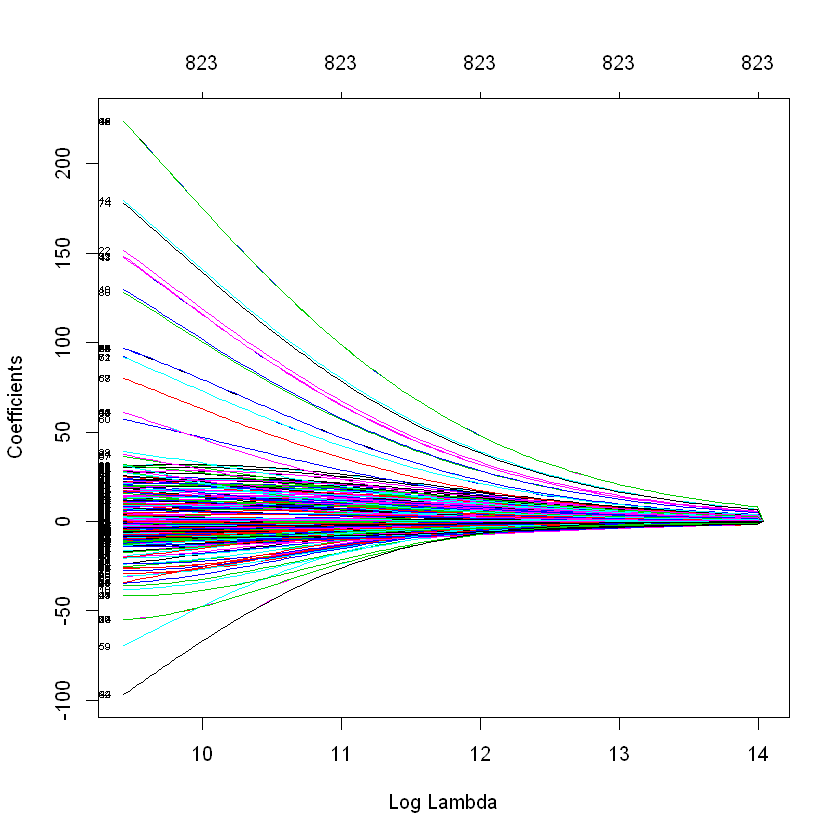

In [8]:
fit.ridge <- glmnet(x,y, alpha = 0)
plot(fit.ridge, xvar = "lambda", label = T)

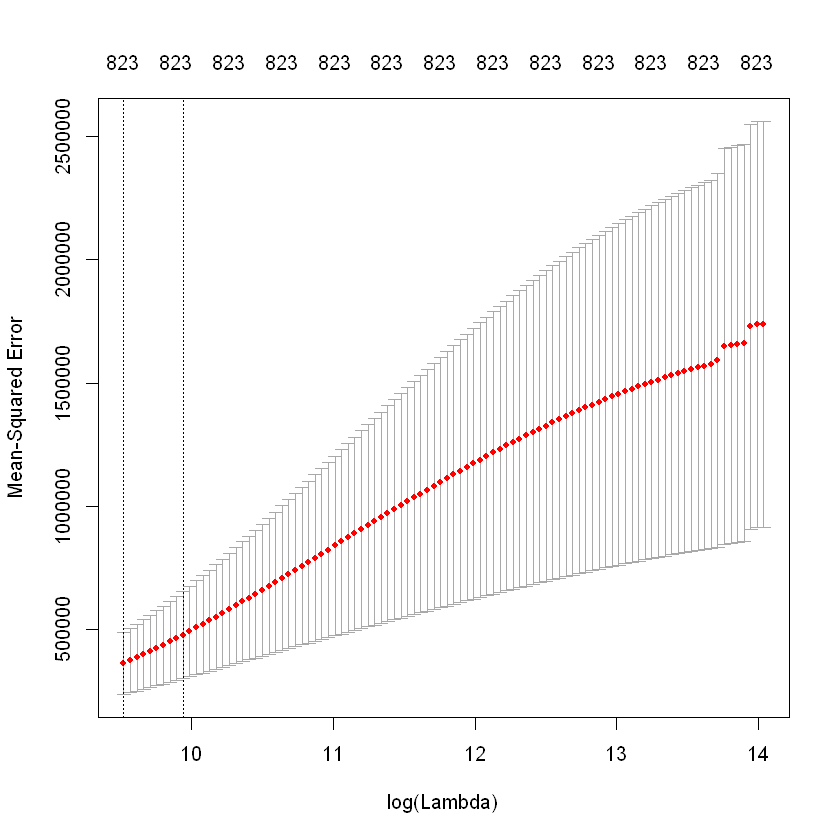

In [9]:
# CV for ridge 

cv.ridge <- cv.glmnet(x,y, alpha = 0)
plot(cv.ridge)

### Using lasso

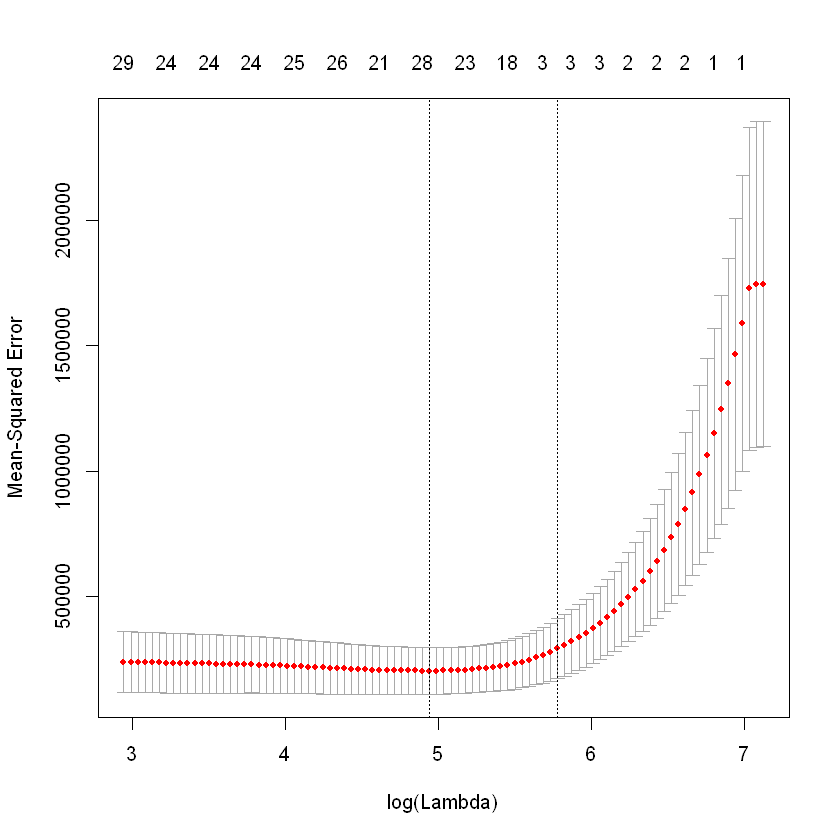

In [10]:
cv.lasso <- cv.glmnet(x,y, alpha = 1, nlambda = 100)
plot(cv.lasso)

In [11]:
# Model fitting using lasso 

fit <- glmnet(x,y, alpha = 1, lambda = cv.lasso$lambda.1se)

In [12]:
fit


Call:  glmnet(x = x, y = y, alpha = 1, lambda = cv.lasso$lambda.1se) 

     Df   %Dev Lambda
[1,]  3 0.8606  323.8

In [13]:
model.predict <- predict(fit,testx)
nrow(model.predict)

[1] 44

In [14]:
sse <- sum((model.predict - testy)^2)
sst <- sum((testy - mean(y))^2)

r_sq <- 1 - (sse/sst)

In [15]:
r_sq

[1] 0.9233906

# Log(Sweetness) Model

In [16]:
# Taking log of Sweetness

log_y <- log10(y)

In [17]:
# Using ridge

log.fit.ridge <- glmnet(x,log_y, alpha = 0)
# plot(log.fit.ridge, xvar = "lambda", label = T)

In [18]:
# CV for ridge 

log.cv.ridge <- cv.glmnet(x,log_y, alpha = 0)
# plot(log.cv.ridge)

In [19]:
# Using lasso for log sweetness

log.cv.lasso <- cv.glmnet(x,log_y, alpha = 1, nlambda = 100)
# plot(log.cv.lasso)

In [20]:
# Model fitting using lasso 

log.fit <- glmnet(x,log_y, alpha = 1, lambda = log.cv.lasso$lambda.1se)
log.fit


Call:  glmnet(x = x, y = log_y, alpha = 1, lambda = log.cv.lasso$lambda.1se) 

     Df   %Dev  Lambda
[1,] 19 0.9679 0.08783

In [21]:
# prediction using test set

log.predict <- predict(log.fit, testx)

In [22]:
log.testy <- log10(testy)

In [23]:
# Calculating r_sq for log(sweetness)

sse <- sum((log.testy - log.predict)^2)
sst <- sum((log.testy - mean(log_y))^2)

log_r_sq <- 1 - (sse/sst)

In [24]:
log_r_sq

[1] 0.963649

# Using different dataset for testing

In [25]:
#Converting into matrix for lasso

data_new <- subset(sp1,select = -c(smiles))

sam <- sample.split(data_new$logSw, SplitRatio = 0.50)
sam_x <- subset(data_new, sam == T)
data_new_x <- model.matrix(logSw ~.-1, data = sam_x)
data_new_y <- sam_x$logSw

In [26]:
log.predict_new_data <- predict(log.fit, data_new_x)

In [27]:
new_sse <- sum((data_new_y - log.predict_new_data)^2)
new_sst <- sum((data_new_y - mean(log_y))^2)

1-new_sse/new_sst

[1] 0.7161388

In [28]:
df <- data.frame(data_new_y, log.predict_new_data)